In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('placement.csv')

In [88]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [89]:
df = df.drop('placed', axis=1)

In [90]:
df.shape

(1000, 2)

In [91]:
rows_to_delete = list(range(300, 300 + 200))
df = df.drop(index=rows_to_delete)

In [92]:
df.head()

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0


In [93]:
df.shape

(800, 2)

Text(0, 0.5, 'exam_marks')

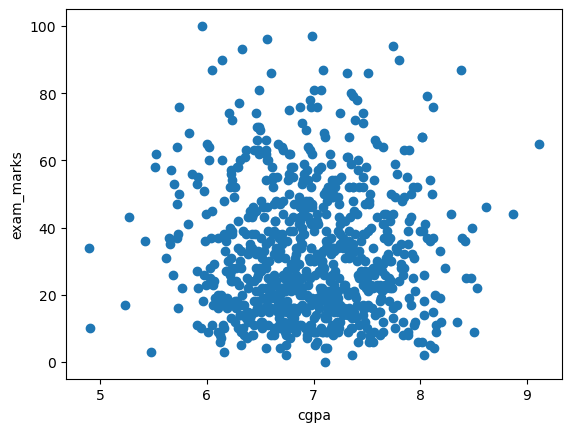

In [94]:
plt.scatter(df['cgpa'], df['placement_exam_marks'])
plt.xlabel('cgpa')
plt.ylabel('exam_marks')

In [95]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [96]:
y

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 800, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

In [100]:
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
X_test

,cgpa
15,7.10
146,6.75
741,7.58
647,6.69
109,7.23
...,...
545,6.35
837,6.65
517,6.37
258,6.12


In [102]:
y_test

15     21.0
146    22.0
741    66.0
647     4.0
109    21.0
       ... 
545    17.0
837    24.0
517    38.0
258     6.0
285    57.0
Name: placement_exam_marks, Length: 160, dtype: float64

In [103]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/home/bharat/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32.07756743])

Text(0, 0.5, 'Package(in lpa)')

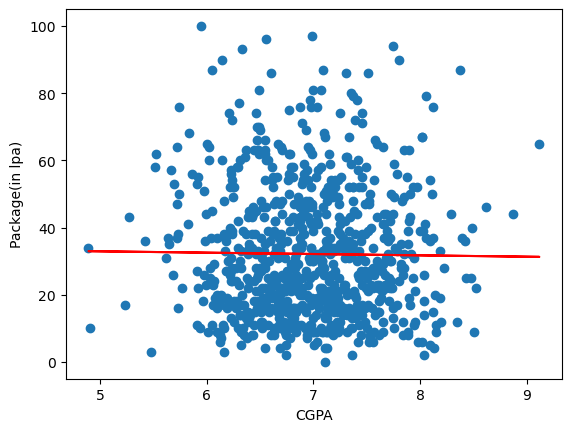

In [104]:
plt.scatter(df['cgpa'],df['placement_exam_marks'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [105]:
m = lr.coef_
print(m)

[-0.39848333]


In [106]:
b = lr.intercept_
print(b)

34.90679905872355


In [34]:
m*8.58+b

array([31.70187282])

### MERA LR

In [73]:
class MeraLr:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
            
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
        
    def predict(self, X_test):
        print(X_test)
        return self.m * X_test + self.b
            

In [74]:
X_train.shape

(640, 1)

In [77]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [78]:
X

array([7.19, 7.46, 7.54, 6.42, 7.23, 7.3 , 6.69, 7.12, 6.45, 7.75, 6.82,
       6.38, 6.58, 5.68, 7.91, 7.1 , 6.53, 7.56, 6.93, 7.63, 6.69, 7.43,
       6.76, 6.05, 6.44, 6.28, 7.45, 6.53, 7.23, 6.51, 7.46, 7.66, 5.91,
       6.23, 8.15, 7.48, 6.85, 8.51, 6.58, 7.25, 6.6 , 6.7 , 7.46, 7.85,
       7.88, 6.92, 7.3 , 6.92, 6.29, 8.23, 6.2 , 6.24, 7.53, 6.69, 8.42,
       8.12, 6.93, 7.73, 7.34, 7.7 , 7.94, 7.51, 7.61, 6.22, 6.98, 6.27,
       6.67, 8.04, 6.58, 7.41, 6.98, 6.13, 7.9 , 6.39, 6.16, 6.77, 8.35,
       7.1 , 8.2 , 7.63, 6.87, 7.12, 7.22, 7.38, 5.65, 6.03, 7.19, 6.96,
       6.78, 6.56, 7.61, 7.42, 6.48, 7.  , 7.15, 6.89, 7.09, 7.33, 8.12,
       7.46, 6.56, 6.48, 5.92, 6.44, 6.82, 6.72, 6.59, 7.32, 5.94, 7.23,
       6.96, 6.48, 7.23, 7.24, 6.3 , 7.28, 7.16, 7.11, 6.9 , 7.  , 6.99,
       5.91, 5.97, 6.25, 6.2 , 7.46, 7.16, 6.95, 6.76, 6.81, 5.91, 8.19,
       7.71, 7.65, 6.33, 6.63, 7.28, 5.69, 7.53, 8.09, 6.85, 7.19, 7.66,
       6.32, 6.67, 7.08, 6.75, 6.68, 6.86, 6.81, 8.

In [79]:
y

array([ 26.,  38.,  40.,   8.,  17.,  23.,  11.,  39.,  38.,  94.,  16.,
         7.,  16.,  26.,  43.,  21.,  19.,  22.,  27.,  29.,  47.,  33.,
        54.,  11.,  11.,  58.,   8.,  46.,  19.,  15.,  16.,  44.,  11.,
        27.,   9.,  12.,  16.,   9.,  20.,  17.,  86.,  38.,  71.,  63.,
        55.,  10.,  15.,  46.,  42.,  28.,  18.,  28.,  27.,  33.,  36.,
        15.,  15.,  24.,  43.,  32.,  31.,  86.,  22.,  26.,  52.,  28.,
        31.,  18.,  30.,  44.,  17.,  20.,  19.,  12.,   3.,  56.,  12.,
        28.,  12.,  19.,  46.,  44.,  12.,  20.,  35.,  28.,  22.,  19.,
        39.,  17.,  15.,   6.,  63.,  30.,  21.,  35.,  28.,  52.,  76.,
        23.,  46.,  26.,  22.,  18.,  47.,  12.,  22.,   9.,  10.,  21.,
        31.,  33.,  15.,  10.,  77.,  37.,  21.,   0.,  54.,  39.,  46.,
        27.,  51.,  52.,  30.,  55.,  37.,  23.,  25.,  39.,  53.,  19.,
        18.,  64.,  93.,  47.,  15.,  53.,   8.,   5.,  22.,  18.,  41.,
        33.,  17.,  28.,  22.,  11.,  49.,  58.,  2

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
mlr = MeraLr()

In [82]:
mlr.fit(X_train, y_train)

-0.3984833283102708
34.90679905872356
